### Gamma correction to the L plane

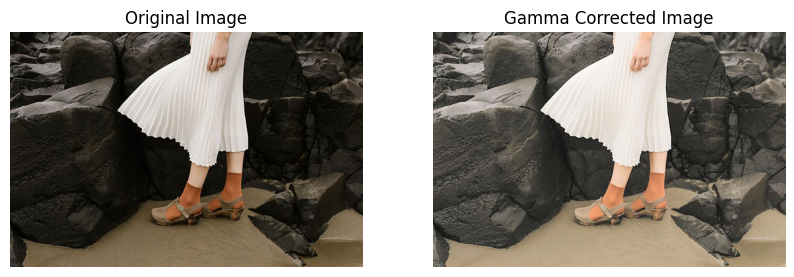

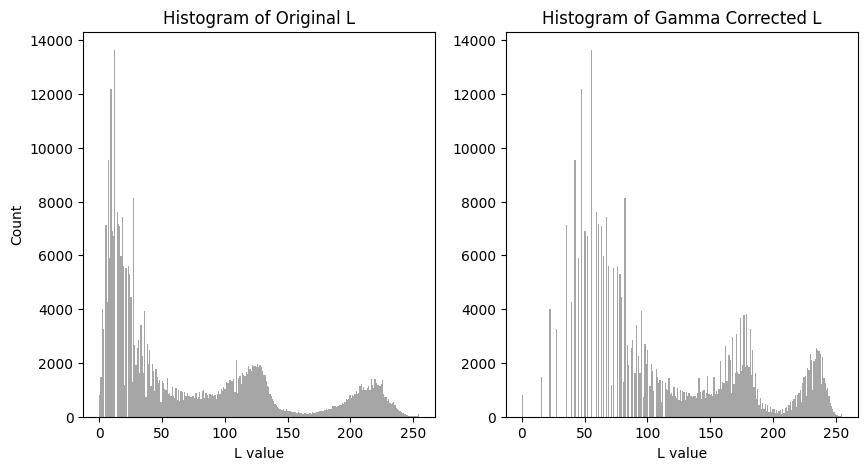

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\highlights_and_shadows.jpg")
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Separate the L, a, b channels
L, a, b = cv2.split(image_lab)

# Function to apply gamma correction
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply gamma correction with gamma = 2.2
gamma_corrected_L = adjust_gamma(L, gamma=0.5)

# Merge back the corrected L plane
lab_gamma_corrected = cv2.merge([gamma_corrected_L, a, b])
image_gamma_corrected = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_Lab2BGR)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gamma_corrected_rgb = cv2.cvtColor(image_gamma_corrected, cv2.COLOR_BGR2RGB)

# Display the original and corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gamma_corrected_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')
plt.show()

# Display histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, color='gray', alpha=0.7, label='Original L')
plt.title('Histogram of Original L')
plt.xlabel('L value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(gamma_corrected_L.ravel(), bins=256, color='gray', alpha=0.7, label='Corrected L')
plt.title('Histogram of Gamma Corrected L')
plt.xlabel('L value')
plt.show()
